# Ridge Regression

Ridge regression is also a linear model for regression, so the formula it uses to make predictions is the same one used for 
ordinary least square. In ridge regression, though, the coefficients(w) are chosen not only so that they predict well on the 
training data, but also to fit an additional constraint. We also want the magnitude of coefficinets to be as small as possible; 
in other words, all entries of w should be close to zero. Intutively this means each feature should have as little effect on the outcome as possible, while still predictiong well. This constraint is an example of what is called regularization. Regularization means explicitly restricting a model to avoid overfitting. THe particular kind used by ridge regression is known as L2 regualarization.

# Boston Housing Dataset

In [1]:
from sklearn.linear_model import Ridge
import mglearn
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [2]:
ridge = Ridge().fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Training set score: 0.89
Test set score: 0.75


The ridge model makes a trade-off between the simplicity of the model(near zero coefficients) and its performance on the training set. How much importance the model places on simplicity versus training set performance can be specified by the user, using the alpha parameter. Default (alpha = 1.0). The optimum setting of alpha depends on the particular dataset we are using. Increasing alpha forces coefficient to move more towards zero, while decreases training set performance but might help generalization. 

## alpha = 10

In [3]:
ridge10 = Ridge(alpha =10).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test,y_test)))

Training set score: 0.79
Test set score: 0.64


For very small values of alpha, coefficients are barely restricted at all, and we end up with a model that resembels LinearRegression

## alpha = 0.1

In [4]:
ridge01 = Ridge(alpha =0.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test,y_test)))

Training set score: 0.93
Test set score: 0.77


Another way to understand the influence of regularization is to fix a value of alpha but vary the amount of traing data available. We subsampled the Boston Housing dataset and evaluated LinearRegression and Ridge(alpha = 1) on subsets of increasing size( plot that shows model performance as a function of dataset size are called learning curves):

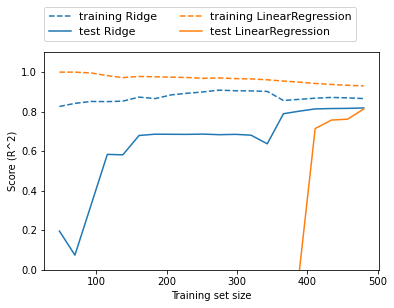

In [5]:
mglearn.plots.plot_ridge_n_samples()

As more and more data becomes available to the model, both models imporove, and linear regression catches up with ridge in the end. The lesson here is that with enough training data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance.